In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
cancer_df=pd.read_csv('../input/data.csv')

In [3]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# check column types in the dataframe

cancer_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
#check null values on each columns
cancer_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#drop unwanted columns
df=cancer_df.drop(['id','Unnamed: 32'],axis=1)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [10]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
#deviding the dataset into predictor and target sets
y=df.iloc[:,:1]
X=df.iloc[:,1:]

In [12]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [14]:
y.diagnosis=y.diagnosis.map({'M':1,'B':0})

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [16]:
#Scale all numerical features in X  using sklearn's StandardScaler class
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
scaled_X_array=scaler.fit_transform(X)

In [18]:
scaled_X=pd.DataFrame(scaled_X_array)

In [19]:
scaled_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [20]:
#Perform PCA on numeric features, X. Use sklearn's PCA class. Only retain as many principal components (PCs) as explain 95% variance.
from sklearn.decomposition import PCA

In [21]:
pca=PCA(.95)

In [22]:
final_X=pca.fit_transform(scaled_X)


In [23]:
final_X.shape

(569, 10)

In [24]:
#viii) Split X,y into train and test datasets in the ratio of 80:20 using sklearn's train_test_split function. 
#You get: X_train, X_test, y_train, y_test.
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test=train_test_split(final_X,y,test_size=.2,shuffle=True)

In [26]:
# ix) Perform modeling on (X_train,y_train) using above listed algorithms (six).

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Create default classifiers

dt=DecisionTreeClassifier()
kn=KNeighborsClassifier()
xgb=XGBClassifier()
et=ExtraTreesClassifier()
gb=GradientBoostingClassifier()
rf=RandomForestClassifier()

In [28]:
# Train data

dt_train=dt.fit(X_train,y_train)


In [29]:
kn_train=kn.fit(X_train,y_train)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [30]:
xgb_train=xgb.fit(X_train,y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
et_train=et.fit(X_train,y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [32]:
gb_train=gb.fit(X_train,y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
rf_train=rf.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [34]:
# Make predictions
y_pred_dt=dt_train.predict(X_test)

In [35]:
y_pred_et=et_train.predict(X_test)

In [36]:
y_pred_rf=rf_train.predict(X_test)

In [37]:
y_pred_gb=gb_train.predict(X_test)

In [38]:
y_pred_xgb=xgb_train.predict(X_test)

In [39]:
y_pred_kn=kn_train.predict(X_test)

In [40]:
#xi) Compare the performance of each of these models by calculating metrics as follows:: 
         #a) accuracy,
         #b) Precision & Recall,
         #c) F1 score,
         #d) AUC
        
# For performance measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [41]:
# Calculate accuracy

In [42]:
accuracy_score(y_test,y_pred_dt)

0.9122807017543859

In [43]:
accuracy_score(y_test,y_pred_et)

0.8947368421052632

In [44]:
accuracy_score(y_test,y_pred_rf)

0.8859649122807017

In [45]:
accuracy_score(y_test,y_pred_gb)

0.9210526315789473

In [46]:
accuracy_score(y_test,y_pred_xgb)

0.9298245614035088

In [47]:
accuracy_score(y_test,y_pred_kn)

0.9298245614035088

In [48]:
# best accuracy score is for XGBoost model.

In [49]:
# calculating Precision,Recall and F1 score for each model. 

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        77
           1       0.89      0.84      0.86        37

   micro avg       0.91      0.91      0.91       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [52]:
print(classification_report(y_test,y_pred_et))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        77
           1       0.86      0.81      0.83        37

   micro avg       0.89      0.89      0.89       114
   macro avg       0.88      0.87      0.88       114
weighted avg       0.89      0.89      0.89       114



In [53]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        77
           1       0.85      0.92      0.88        37

   micro avg       0.92      0.92      0.92       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



In [54]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        77
           1       0.87      0.92      0.89        37

   micro avg       0.93      0.93      0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



In [55]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        77
           1       0.85      0.78      0.82        37

   micro avg       0.89      0.89      0.89       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.89      0.88       114



In [56]:
print(classification_report(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        77
           1       0.94      0.84      0.89        37

   micro avg       0.93      0.93      0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [57]:
# creating confusion matrics for each model
confusion_matrix(y_test,y_pred_dt)



array([[73,  4],
       [ 6, 31]])

In [58]:
confusion_matrix(y_test,y_pred_et)

array([[72,  5],
       [ 7, 30]])

In [59]:
confusion_matrix(y_test,y_pred_gb)

array([[71,  6],
       [ 3, 34]])

In [60]:
confusion_matrix(y_test,y_pred_xgb)

array([[72,  5],
       [ 3, 34]])

In [61]:
confusion_matrix(y_test,y_pred_rf)

array([[72,  5],
       [ 8, 29]])

In [62]:
confusion_matrix(y_test,y_pred_kn)

array([[75,  2],
       [ 6, 31]])

In [63]:
# Again XGB model has the best results as per the F1 score as well and this has the best confusion matrix too.

In [64]:
# calculating the AUC values for each model

In [65]:
# decission tree model

In [66]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,
                                 dt_train.predict_proba(X_test)[: , 1],
                                 pos_label= 1
                                 )

In [67]:
dt_auc=auc(fpr_dt,tpr_dt)

In [68]:
# ExtraTreesClassifier model

In [69]:
fpr_et, tpr_et, thresholds = roc_curve(y_test,
                                 et_train.predict_proba(X_test)[: , 1],
                                 pos_label= 1
                                 )


In [70]:
et_auc=auc(fpr_et,tpr_et)

In [71]:
# random forest classifier model

In [72]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test,
                                 rf_train.predict_proba(X_test)[: , 1],
                                 pos_label= 1
                                 )
rf_auc=auc(fpr_rf,tpr_rf)

In [73]:
fpr_gb, tpr_gb, thresholds = roc_curve(y_test,
                                 gb_train.predict_proba(X_test)[: , 1],
                                 pos_label= 1
                                 )
gb_auc=auc(fpr_gb,tpr_gb)

In [74]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test,
                                 xgb_train.predict_proba(X_test)[: , 1],
                                 pos_label= 1
                                 )
xgb_auc=auc(fpr_xgb,tpr_xgb)

In [75]:
fpr_kn, tpr_kn, thresholds = roc_curve(y_test,
                                 kn_train.predict_proba(X_test)[: , 1],
                                 pos_label= 1
                                 )
kn_auc=auc(fpr_kn,tpr_kn)

In [76]:
auc_dict={'dt_auc':dt_auc,'et_auc':et_auc,'rf_auc':rf_auc,'gb_auc':gb_auc,'xgb_auc':xgb_auc,'kn_auc':kn_auc}

In [77]:
max(auc_dict)

'xgb_auc'

In [78]:
#again the AUC specifies the XGB is the best model for this prediction.

In [79]:
#xii) Also draw ROC curve for each

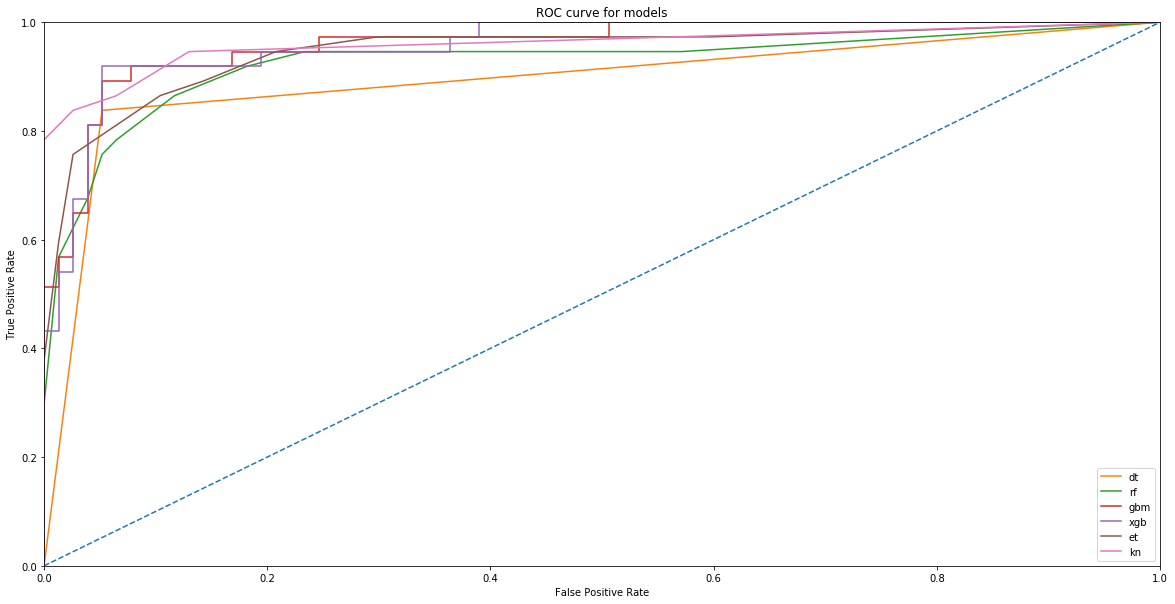

In [80]:
fig = plt.figure(figsize=(20,10))          
ax = fig.add_subplot(111)   


ax.plot([0, 1], [0, 1], ls="--")  

ax.set_xlabel('False Positive Rate')  
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')


ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])


ax.plot(fpr_dt, tpr_dt, label = "dt")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_gb, tpr_gb, label = "gbm")
ax.plot(fpr_xgb, tpr_xgb, label = "xgb")
ax.plot(fpr_et, tpr_et, label = "et")
ax.plot(fpr_kn, tpr_kn, label = "kn")

ax.legend()
plt.show()

In [81]:
## From all metrices the XGB model gives the best results.

In [82]:
# Dtata Explorationa and Visualization:


In [83]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [84]:
cancer_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

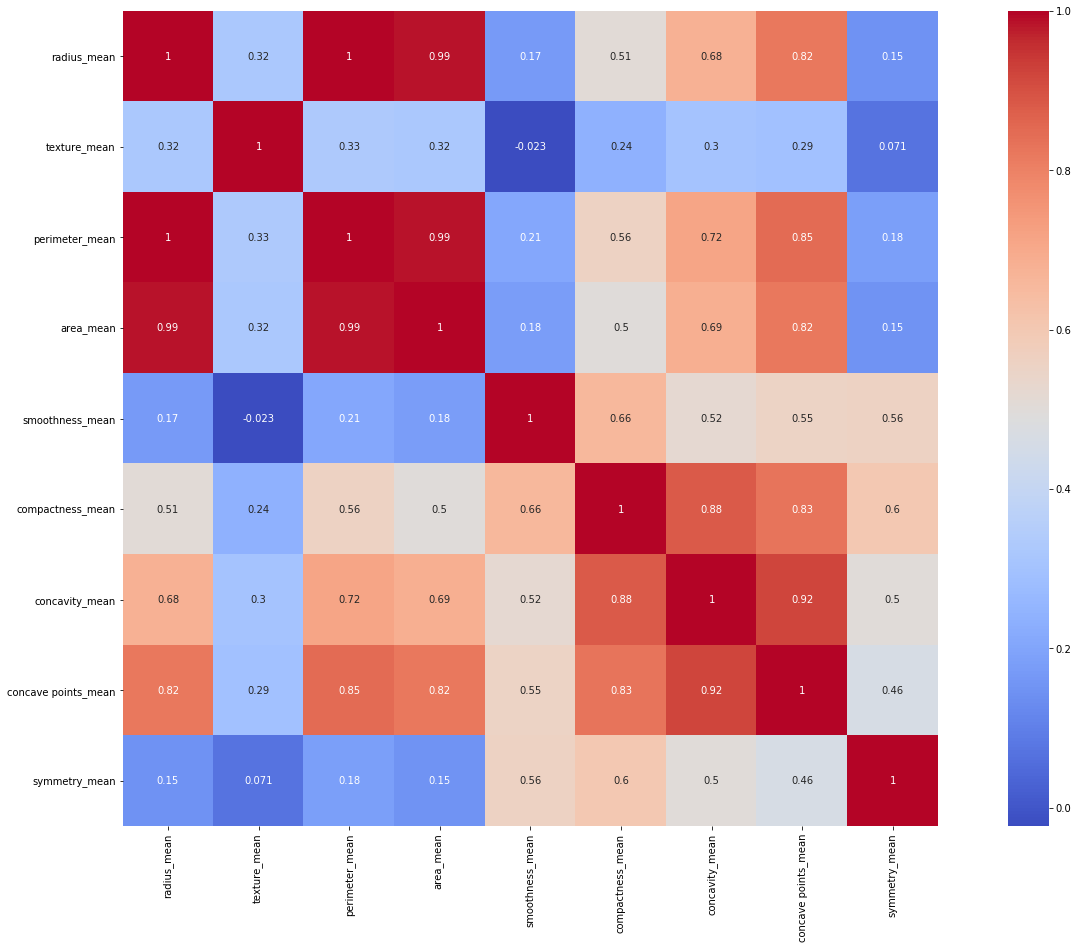

In [85]:
# Here we will use Seaborn to create a heat map of the correlations between the features.
features_mean= list(cancer_df.columns[1:11])
plt.figure(figsize=(25,15))
sns.heatmap(cancer_df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


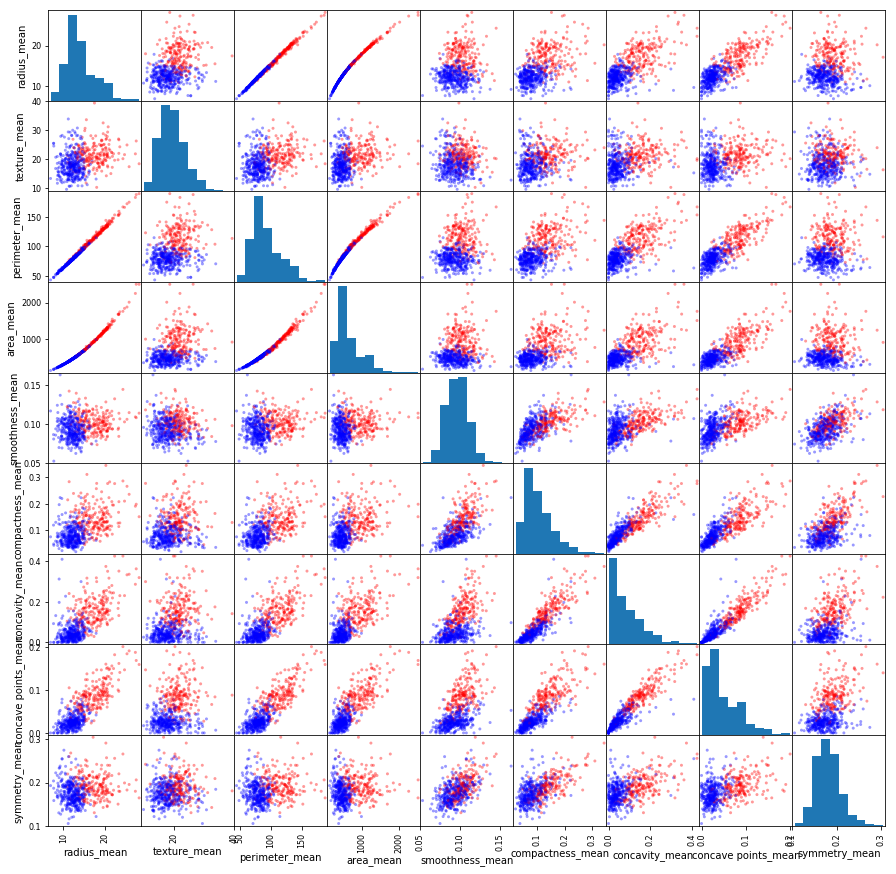

In [86]:
color_dic = {'M':'red', 'B':'blue'}
colors = cancer_df['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.scatter_matrix(cancer_df[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


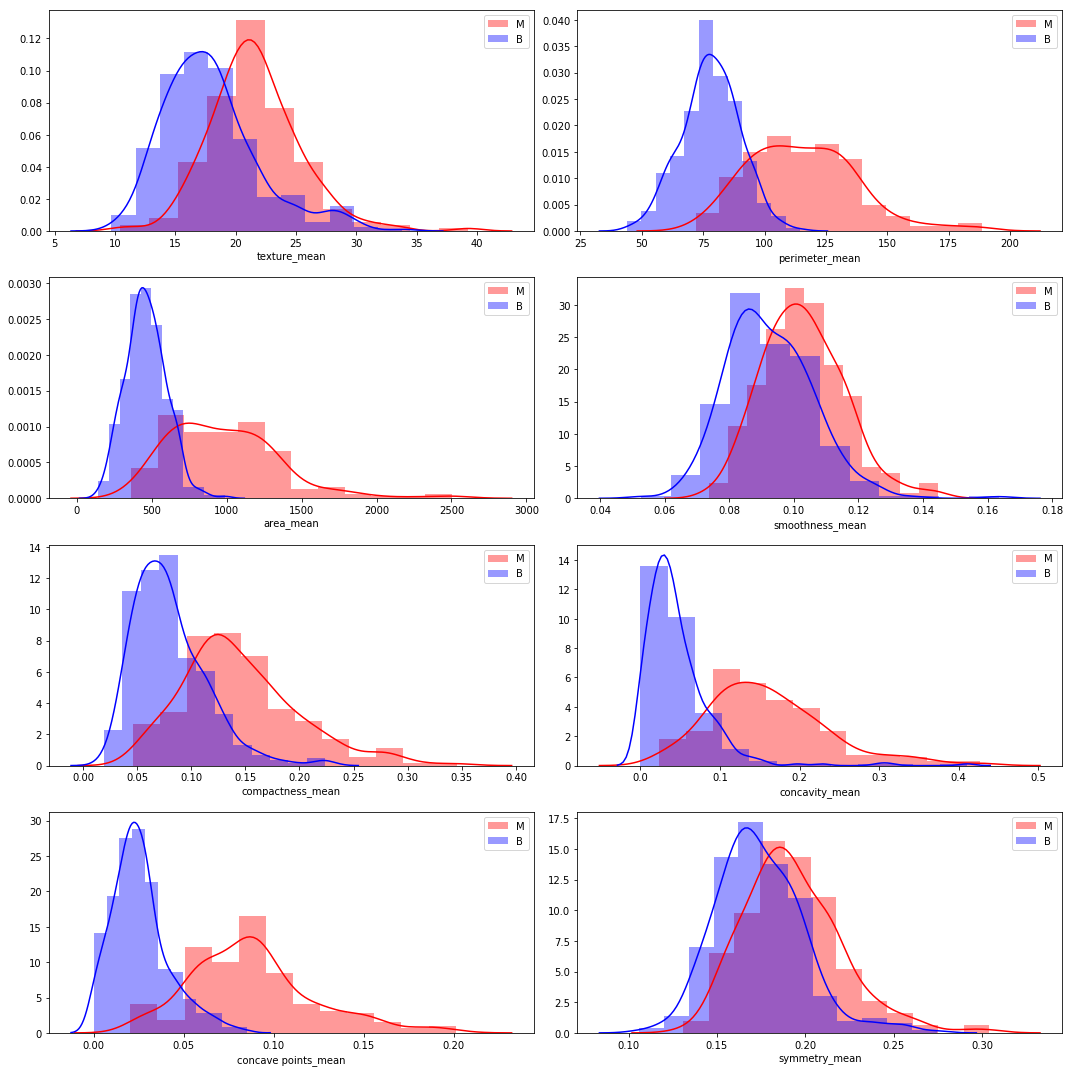

In [92]:
# plotting the distribution of each type of diagnosis for each of the mean features.

bins = 12
plt.figure(figsize=(15,15))
rows = int(len(features_mean)/2)
features_mean = features_mean[1:]
for i, feature in enumerate(features_mean):
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(cancer_df[cancer_df['diagnosis']=='M'][feature], bins=bins, color='r', label='M');
    sns.distplot(cancer_df[cancer_df['diagnosis']=='B'][feature], bins=bins, color='b', label='B');
    

    plt.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

In [ ]:
bins = 12
plt.figure(figsize=(10,8))


sns.distplot(cancer_df[cancer_df['diagnosis']=='M']['radius_mean'], bins=bins, color='r', label='M');
sns.distplot(cancer_df[cancer_df['diagnosis']=='B']['radius_mean'], bins=bins, color='b', label='B');

In [ ]:
rows = int(len(features_mean)/2)
rows

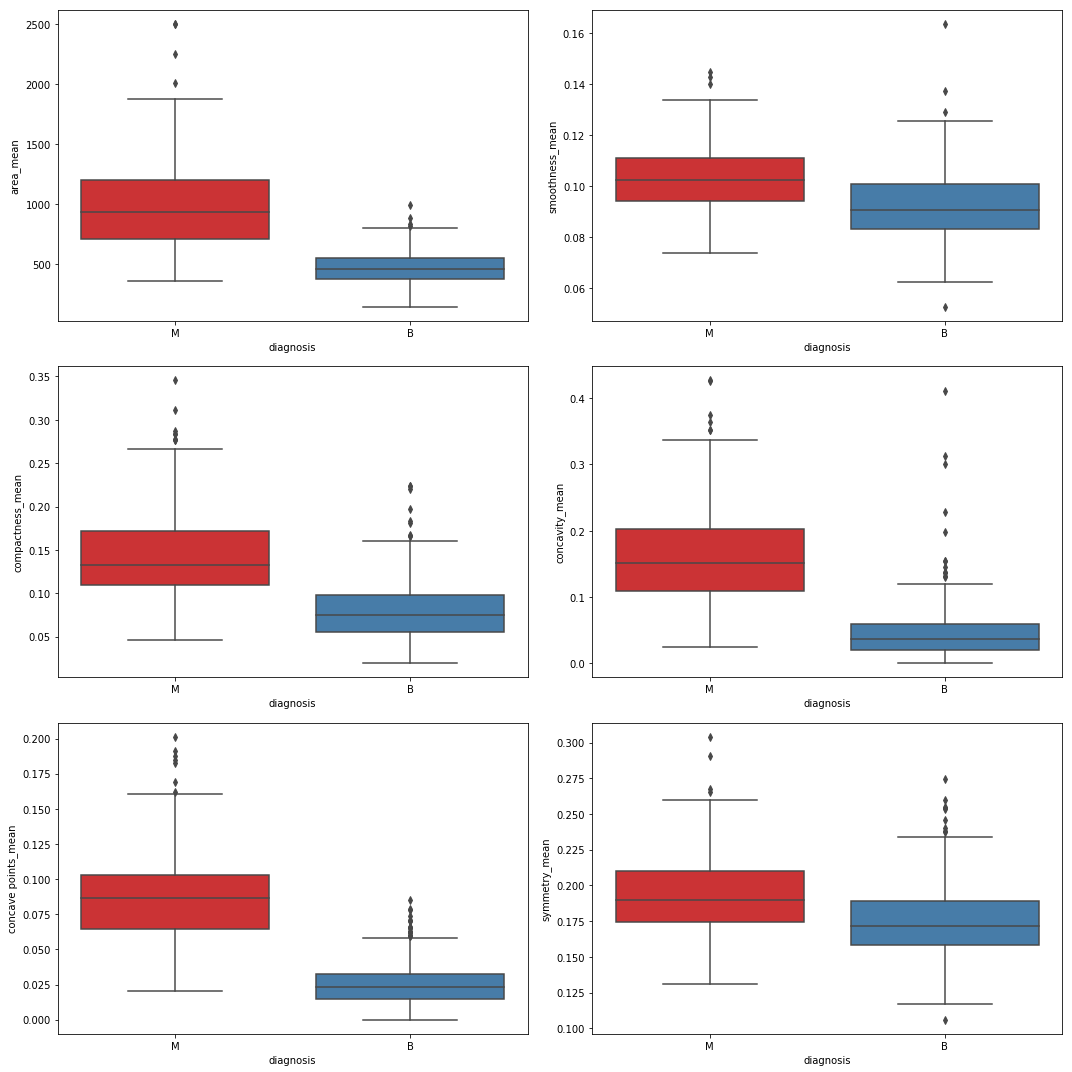

In [94]:
plt.figure(figsize=(15,15))
features_mean = features_mean[1:]
rows = int(len(features_mean)/2)
for i, feature in enumerate(features_mean):
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=cancer_df, palette="Set1")

plt.tight_layout()
plt.show()

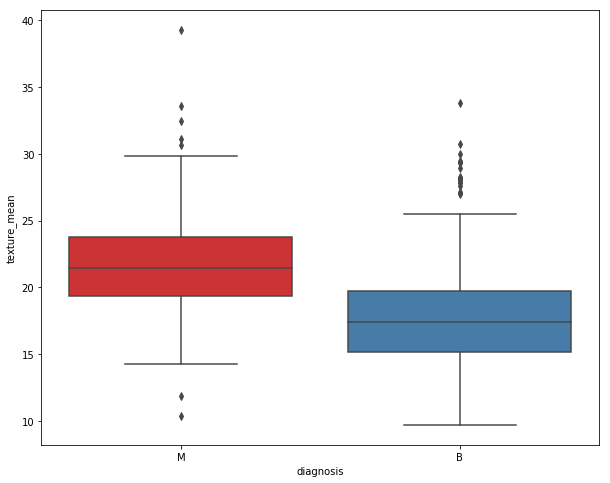

In [89]:
plt.figure(figsize=(10,8))

sns.boxplot(x='diagnosis',y='texture_mean',data=cancer_df,palette="Set1")

In [88]:
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    print(i,rows,feature)

0 5 diagnosis
1 5 radius_mean
2 5 texture_mean
3 5 perimeter_mean
4 5 area_mean
5 5 smoothness_mean
6 5 compactness_mean
7 5 concavity_mean
8 5 concave points_mean
9 5 symmetry_mean
